# Cartopy

In [1]:
!pip install Cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 53.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


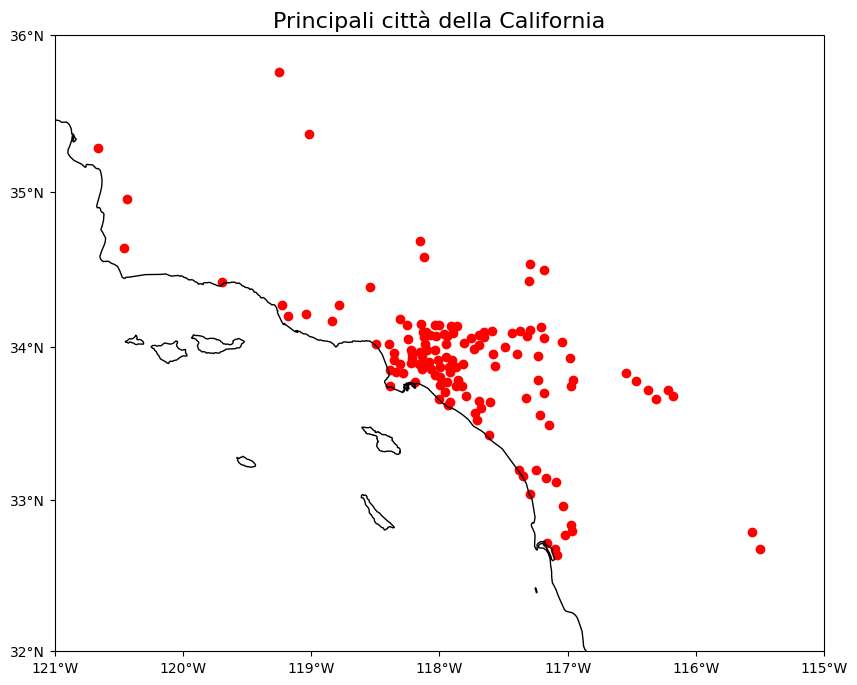

In [3]:
# Caricamento dati
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
calif_cities = us_cities[us_cities.State.eq('California')]

# Mappa
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

# Imposta tick con il CRS corretto
ax.set_yticks([32, 33, 34, 35, 36], crs=ccrs.PlateCarree())
ax.set_xticks([-121, -120, -119, -118, -117, -116, -115], crs=ccrs.PlateCarree())

# Formattatori di coordinate
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Estensione della mappa (California)
ax.set_extent([-121, -115, 32, 36])

# Scatter plot delle città
X = calif_cities['lon']
Y = calif_cities['lat']
ax.scatter(X, Y, color='red', marker='o', transform=ccrs.PlateCarree())

plt.title("Principali città della California", fontsize=16)
plt.show()


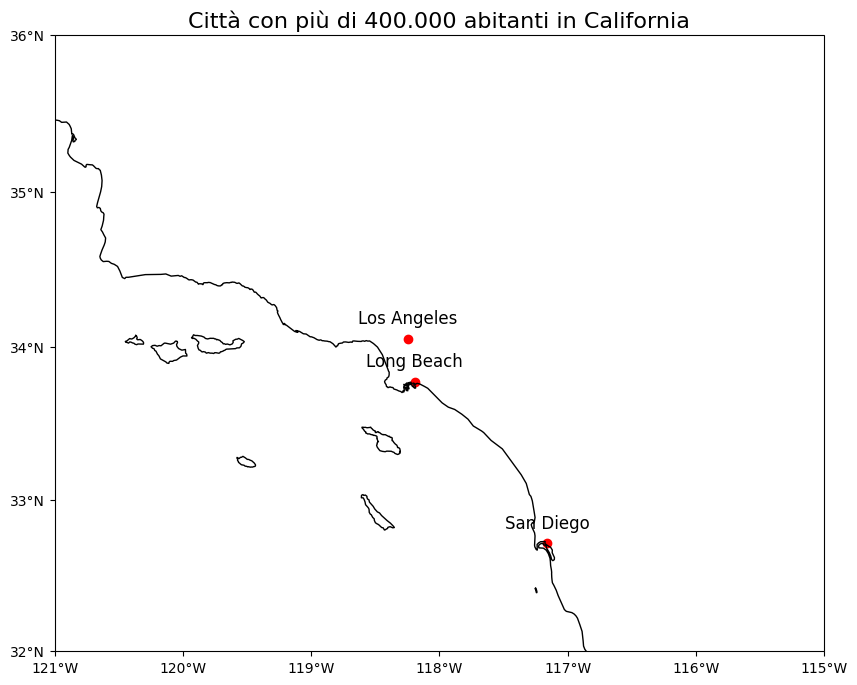

In [4]:
# Dati
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")
calif_cities = us_cities[us_cities.State == 'California']
top_calif_cities = calif_cities[calif_cities['Population'] >= 400000]

# Mappa
fig = plt.figure(figsize=[15, 8])
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')

# Coordinate e ticks
ax.set_yticks([32, 33, 34, 35, 36], crs=ccrs.PlateCarree())
ax.set_xticks([-121, -120, -119, -118, -117, -116, -115], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.set_extent([-121, -115, 32, 36])

# Dati città
X = top_calif_cities['lon']
Y = top_calif_cities['lat']
cities = top_calif_cities['City']

# Scatter e label
ax.scatter(X, Y, color='red', marker='o', transform=ccrs.PlateCarree())

for i in top_calif_cities.index:
    ax.text(X[i], Y[i] + 0.1, cities[i],
            transform=ccrs.Geodetic(), fontsize=12,
            horizontalalignment='center', clip_on=True)

plt.title("Città con più di 400.000 abitanti in California", fontsize=16)
plt.show()


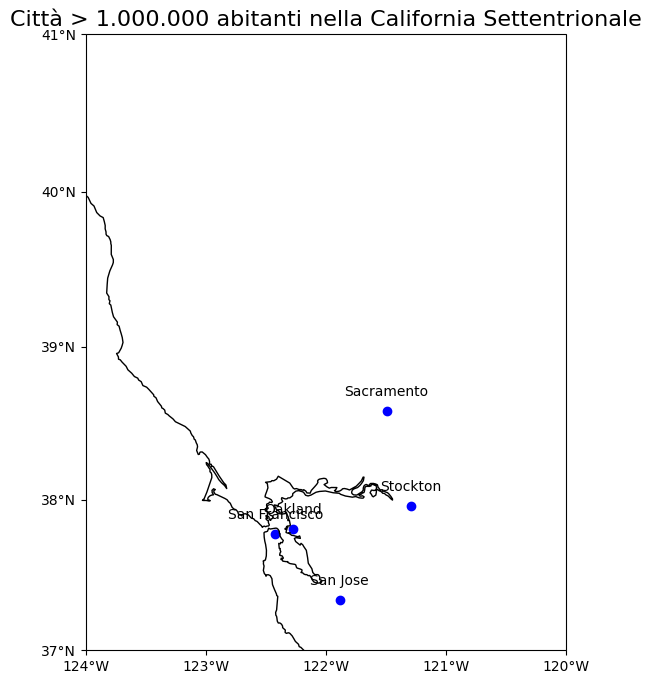

In [8]:
# Esercizio: Disegnare una mappa con Cartopy e Matplotlib
# Ora che sapete come creare una mappa con Cartopy e Matplotlib, create una mappa che
# mostri le città di un’altra località degli Stati Uniti. Ad esempio, potreste creare una mappa
# per la California settentrionale. È necessario specificare valori diversi di latitudine e longitudine
# per gli assi y e x.

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter

us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv") # carico le città
calif_north = us_cities[(us_cities.State == 'California') & (us_cities.lat > 37)] # filtro per la california settentrionale
top_cities = calif_north[calif_north['Population'] >= 250000] # solo città con 100k, possiamo anche metterne 250k

fig = plt.figure(figsize=[15, 8]) # creo la mappa da plottare
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_extent([-124, -120, 37, 41], crs=ccrs.PlateCarree())  # California settentrionale

ax.set_xticks([-124, -123, -122, -121, -120], crs=ccrs.PlateCarree()) # aggiunta della griglia
ax.set_yticks([37, 38, 39, 40, 41], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

X = top_cities['lon'] # scatter delle città
Y = top_cities['lat']
cities = top_cities['City']

ax.scatter(X, Y, color='blue', marker='o', transform=ccrs.PlateCarree())

for i in top_cities.index: #etichette delle città
    ax.text(X[i], Y[i] + 0.1, cities[i],
            transform=ccrs.Geodetic(), fontsize=10,
            horizontalalignment='center', clip_on=True)

plt.title("Città > 1.000.000 abitanti nella California Settentrionale", fontsize=16)
plt.show()

